In [116]:
# Adding the path to the TS_Agent.py file as a system path
import sys  
sys.path.append('../src')
# Importing the .py file with TS agent definition
import TS_Agent as agent_def

# Importing other required libs
import matplotlib.pyplot as plt 
import numpy as np

## Case Study:

### A battery agent needs to make actions for 300 instants out of all available 1440 instants in a day to achieve its desired charged state. However, the price paid for charging at each instant of the day is variable and is unknown to the learning agent.

In [117]:
# Initializing an Agent named "Agent 1" that needs 
agent_name = "Agent_1"
resource_required = 300
instants = 1440
alpha = 1

Agent1 = agent_def.TS_Agent(agent_name, resource_required, instants, alpha)

In [118]:
# Making a variable price curve for the agent's reward. It can be replaced with more realistic electricity price curve as well.
# It should be noted that here reward = price_curve = 1 - electricity price

price_curve = np.array([1 if (t>600 and t<900) else 0 for t in range(0,1440)])

In [119]:
# Number of simulation days
days = 100

In [120]:
# A list for recording agent's observed rewards
observed_rewards = []

# For each simulation day, the learning agent will make a charging policy. It will then observe rewards equal to instataneous 
# price for each selected charging minute of the simulation day. Agent will update its estimate based on this reward.
for day in range (0,days):
    Agent1.select_actions()
    for minute in range(0,1440):
        if (minute in Agent1.get_selected_actions()):
            Agent1.update_estimate( minute,price_curve[minute])
            observed_rewards.append( price_curve[minute])

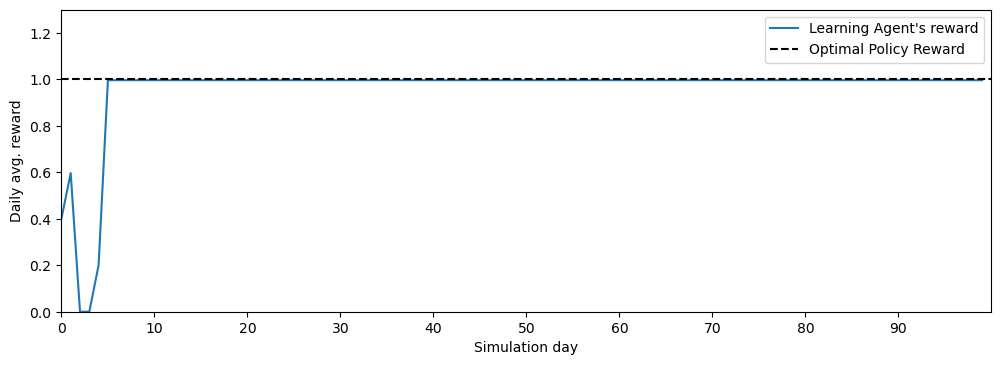

In [121]:
# Plotting average daily reward observed by the learning agent
plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(np.average(np.array(observed_rewards).reshape(-1, resource_required), axis=1))
plt.axhline(y=1, color='black', linestyle='--', alpha = 1);
plt.xlabel('Simulation day')
plt.ylabel('Daily avg. reward')
plt.legend(["Learning Agent's reward", 'Optimal Policy Reward'])
plt.xlim(0,days)
plt.ylim(0,1.3)
plt.xticks([i for i in range(0,days,10)]);